# Automated facular regions detection based on morphological operators
The following is a sequence based on morphological operators to segment sunspots on H-alpha images from the spectroheliograph of Coimbra Observatory

In [2]:
import diplib as dip

DIPlib -- a quantitative image analysis library
Version 3.1.0 (Sep 24 2021)
For more information see https://diplib.org


In [3]:
cd c:\users\mmigu\.spyder-py3.

c:\users\mmigu\.spyder-py3


### 1. Reading and displaying the image

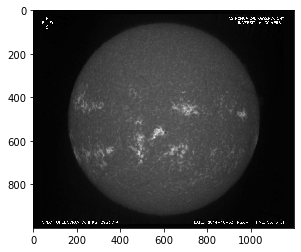

In [4]:
img = dip.ImageReadTIFF('141003K3')
img.Show()

### 2. Creating the Sun mask

In [1]:
ope = dip.Opening(img,5)
ope.Show()


NameError: name 'dip' is not defined

Thresholding of the image to obtain a binary mask of the sun (correspond to all non-zero pixels)

In [ ]:
bin = dip.FixedThreshold(ope,30)
bin.Show()

Morphological gradient to automatic detect the solar disk contour

In [ ]:
contSun = dip.MorphologicalGradientMagnitude(bin)
contSun.Show()

Contour of the mask, obtained by morphological gradient, which is superimposed to the input image

In [ ]:
img_ovr_sun = dip.Overlay(img,contSun)
img_ovr_sun.Show()

### 3. Segmentation of facular regions

Computation of the black tophat

In [ ]:
WTH = dip.Tophat(ope,50)
WTH.Show()

Binarization of facular regions

In [ ]:
binWTH = dip.FixedThreshold(WTH,30)
binWTH.Show()

Fill holes of facular regions

In [ ]:
fbinWTH = dip.FillHoles(binWTH)
fbinWTH.Show()


Reconstrucion of facular regions

In [ ]:
opeREC = dip.OpeningByReconstruction(fbinWTH,10)
opeREC.Show()


Determination of the contours of the facular regions with a half-gradient or morphological external gradient, superposed to the input image

In [ ]:
contFR = dip.Dilation(fbinWTH) - fbinWTH
contFR.Show()

In [ ]:
img_ovr_FR = dip.Overlay(img,contFR)
img_ovr_FR.Show()


Save the ouput result in a standard image format


In [ ]:
dip.ImageWriteJPEG(img_ovr_FR,'141003K3_facular.jpg')